# Random Digits Exercice - Solutions

Below is a series of tests that can be performed on any of the RandomDigits datasets of the exercice. Here are the _actual_ answers for 2018:

* data_RandomDigits_100WithShift_2018 $\rightarrow$ D
* data_RandomDigits_7thCopiedFrom5before_2018.txt $\rightarrow$ C
* data_RandomDigits_TrulyRandom_2018.txt $\rightarrow$ E
* data_RandomDigits_Students_2018.txt $\rightarrow$ A
* data_RandomDigits_DigitsOfPi_2018.txt $\rightarrow$ B
* data_RandomDigits_IceCubedata_2018.txt $\rightarrow$ F
* data_RandomDigits_fourgaussians_2018.txt $\rightarrow$ G


##  Author: 
- Troels Petersen ([email](mailto:petersen@nbi.dk))
- Étienne Bourbeau (notebook conversion) ([email](mailto:etienne.bourbeau@icecube.wisc.edu))

##  Date:
5th of December 2018

---

In [1]:
#Load modules here
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import matplotlib as mpl
# Set som plotting standards
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}

mpl.rc('font', **font)

from iminuit import Minuit                             # The actual fitting tool, better than scipy's
from probfit import Chi2Regression                     # Helper tool for fitting
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import os, sys                                         # Modules to see files and folders in directories
from os.path import dirname as parent_folder


In [2]:
sys.path.append('../External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax

---
## Define your functions here:


In [3]:
# Fill 1d histograms
def create_1d_hist(ax, values, bins, x_range, title):
    ax.hist(values, bins, x_range, histtype='step', normed=True, lw=2)         
    ax.set(xlim=x_range, title=title)
    hist_data = np.histogram(values, bins, x_range)
    return hist_data

In [4]:
# Fill 2d histograms
def create_2d_hist(ax, values1, values2, bins, x_range, y_range, title, figure):
    hist2d = ax.hist2d(values1, values2, bins=bins, range=[x_range, y_range], normed=True)           
    ax.set(xlim=x_range, ylim=y_range, title=title)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    figure.colorbar(hist2d[3], cax=cax, orientation='vertical')
    hist_data = np.histogram2d(values1, values2, bins, range=[x_range, y_range])
    return hist_data

In [5]:
def get_chi2_ndf( hist, const):
    data = hist[0]
    const_unnormed = const * data.sum()
    chi2 = np.sum( (data - const_unnormed)**2 / data )
    ndof = data.size
    return chi2, ndof

In [6]:
def constant_fit(x, c):
    return c

In [7]:
def fit_1d_histogram_with_constant(hist, input_data, ax):
    
    counts, x_edges = hist
    x_centers = 0.5*(x_edges[1:] + x_edges[:-1])
    
    x = x_centers
    y = counts
    sy = np.sqrt(y)

    
    chi2_object = Chi2Regression(constant_fit, x, y, sy)
    minuit = Minuit(chi2_object, pedantic=False)
    minuit.migrad() # fit
    
    fit_c = minuit.values['c']
    fit_sc = minuit.errors['c']
    chi2_val = minuit.fval
    N_DOF = len(y) - 1
    chi2_prob = stats.chi2.sf(chi2_val, N_DOF)
    
    d= {'Entries' : "{:d}".format(len(input_data)),
        'Mean'    : "{:.5f}".format(input_data.mean()),
        'STD Dev' : "{:.5f}".format(input_data.std(ddof=1)),
        'Chi2/ndf': "{:.3f} +/- {:2d}".format(chi2_val, N_DOF),
        'Prob'    : "{:.3f}".format(chi2_prob),
        'c'       :"{:.2f} +/- {:.2f}".format(fit_c, fit_sc)
       }
    
    ax.text(0.06, 0.40, nice_string_output(d),
        family='monospace',
        transform=ax.transAxes, fontsize=9,
        verticalalignment='top')

---
## Import random numbers from text file:

In [8]:
# Define list of input files
infiles = ["../Week4/RandomDigitsTest/data_RandomDigits2018_D.txt" ]

In [9]:
# List containing all numbers
numbers = []

In [10]:
# Loop over input files open them in read mode
for ifile in infiles : 
    with open( ifile, "r" ) as current_file : 
        # Extract current file info : loop through each line in the file, loop through each character
        # in the line, demand character is not empty ("") and convert the result to an integer
        # Finally add result to the numbers list
        numbers += [int(char) for line in current_file for char in line.strip() if char is not ""]

In [11]:
numbers = np.array(numbers)

---
## Define your output:

In [12]:
plt.ioff()
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
ax_number, ax_odd_even, ax_high_low, ax_corr_number, ax_corr_odd_even, ax_corr_high_low = ax.flatten()

In [13]:
# Fill 1d histograms:
hist_numbers  = create_1d_hist(ax_number,   numbers,     10, (-0.5, 9.5), 'Numbers posted')                # Plot all digits
hist_odd_even = create_1d_hist(ax_odd_even, numbers % 2,  2, (-0.5, 1.5), 'Even and odd numbers')          # Is number even or odd
hist_high_low = create_1d_hist(ax_high_low, numbers // 5, 2, (-0.5, 1.5), 'Above and equal to or below 5') # Is number >= or < 5

/opt/conda/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


In [14]:
# Fill 2d histograms:
corr_number = create_2d_hist(ax_corr_number,   numbers[1:], numbers[:-1], [10, 10], 
               [-0.5, 9.5], [-0.5, 9.5], 'Correlation to previous number', fig)
corr_odd_even = create_2d_hist(ax_corr_odd_even, numbers[1:] % 2, numbers[:-1] % 2, [2, 2], 
               [-0.5, 1.5], [-0.5, 1.5], 'Correlation to last high/low number', fig)
corr_high_low = create_2d_hist(ax_corr_high_low, numbers[1:] // 5, numbers[:-1] // 5, [2, 2], 
               [-0.5, 1.5], [-0.5, 1.5], 'Correlation to last high/low number', fig)

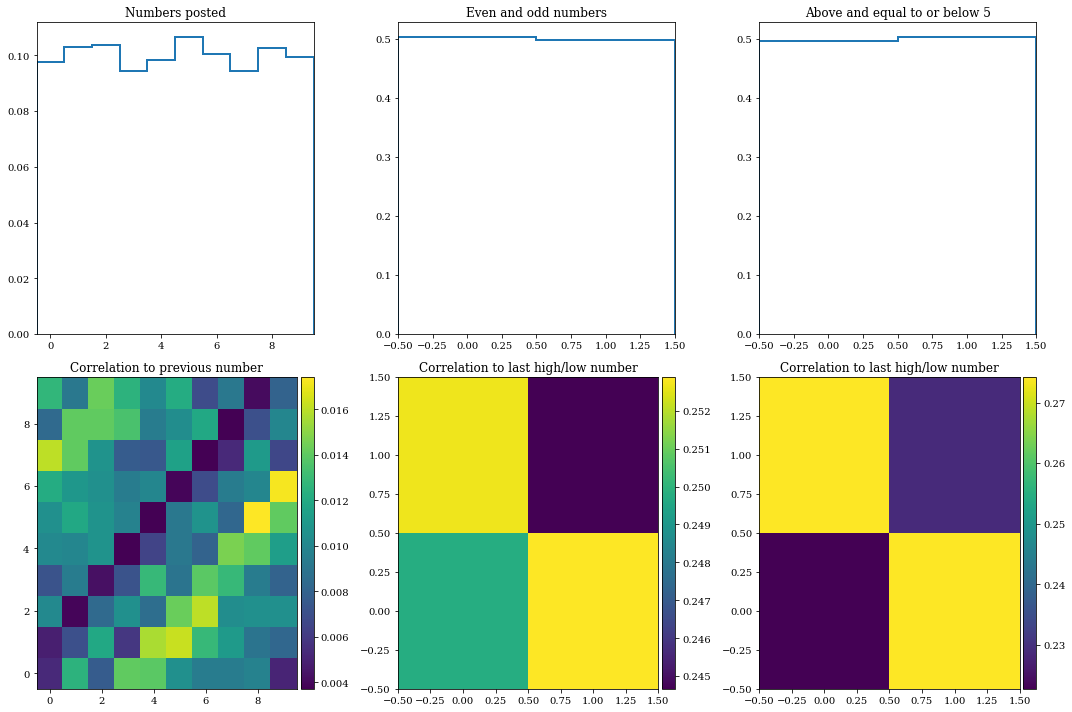

In [15]:
fig.tight_layout()
fig

---
## Calculate the $\chi^{2}$ given a constant value (Constant is not a free parameter here)

In [16]:
chi2_ndf_number_hist   = get_chi2_ndf( hist_numbers,  1.0 / 10)
chi2_ndf_odd_even_hist = get_chi2_ndf( hist_odd_even, 1.0 / 2 )
chi2_ndf_high_low_hist = get_chi2_ndf( hist_high_low, 1.0 / 2 )

In [17]:
chi2_ndf_number_corr   = get_chi2_ndf( corr_number  , 1.0 / 10**2, )
chi2_ndf_odd_even_corr = get_chi2_ndf( corr_odd_even, 1.0 / 2**2   )
chi2_ndf_high_low_corr = get_chi2_ndf( corr_high_low, 1.0 / 2**2   )

In [18]:
# Offset to number of degrees of freedom (choosing if the overall number of events is know, which I would say it is):
dNdof = 0

In [19]:
# Write your result : 
print("Compatability that distributions stem from random numbers : ")
print("Raw numbers                : Chi^2/NDF = {:6.2f} / {:6.2f} -> P(Chi2, NDF) = {:10.8f}".format(chi2_ndf_number_hist[0], chi2_ndf_number_hist[1]-dNdof, 
                                                                                           stats.chi2.sf(chi2_ndf_number_hist[0], chi2_ndf_number_hist[1]-dNdof)))
print("Raw numbers correlation    : Chi^2/NDF = {:6.2f} / {:6.2f} -> P(Chi2, NDF) = {:10.8f}".format(chi2_ndf_number_corr[0], chi2_ndf_number_corr[1]-dNdof, 
                                                                                           stats.chi2.sf(chi2_ndf_number_corr[0], chi2_ndf_number_corr[1]-dNdof)))
print("Odd even                   : Chi^2/NDF = {:6.2f} / {:6.2f} -> P(Chi2, NDF) = {:10.8f}".format(chi2_ndf_odd_even_hist[0], chi2_ndf_odd_even_hist[1]-dNdof, 
                                                                                           stats.chi2.sf(chi2_ndf_odd_even_hist[0], chi2_ndf_odd_even_hist[1]-dNdof)))
print("Odd even correlation       : Chi^2/NDF = {:6.2f} / {:6.2f} -> P(Chi2, NDF) = {:10.8f}".format(chi2_ndf_odd_even_corr[0], chi2_ndf_odd_even_corr[1]-dNdof, 
                                                                                           stats.chi2.sf(chi2_ndf_odd_even_corr[0], chi2_ndf_odd_even_corr[1]-dNdof)))
print("High Low                   : Chi^2/NDF = {:6.2f} / {:6.2f} -> P(Chi2, NDF) = {:10.8f}".format(chi2_ndf_high_low_hist[0], chi2_ndf_high_low_hist[1]-dNdof, 
                                                                                           stats.chi2.sf(chi2_ndf_high_low_hist[0], chi2_ndf_high_low_hist[1]-dNdof)))
print("High Low correlation       : Chi^2/NDF = {:6.2f} / {:6.2f} -> P(Chi2, NDF) = {:10.8f}".format(chi2_ndf_high_low_corr[0], chi2_ndf_high_low_corr[1]-dNdof, 
                                                                                           stats.chi2.sf(chi2_ndf_high_low_corr[0], chi2_ndf_high_low_corr[1]-dNdof)))

Compatability that distributions stem from random numbers : 
Raw numbers                : Chi^2/NDF =   7.37 /  10.00 -> P(Chi2, NDF) = 0.69036442
Raw numbers correlation    : Chi^2/NDF = 775.94 / 100.00 -> P(Chi2, NDF) = 0.00000000
Odd even                   : Chi^2/NDF =   0.13 /   2.00 -> P(Chi2, NDF) = 0.93599371
Odd even correlation       : Chi^2/NDF =   0.91 /   4.00 -> P(Chi2, NDF) = 0.92310547
High Low                   : Chi^2/NDF =   0.18 /   2.00 -> P(Chi2, NDF) = 0.91570075
High Low correlation       : Chi^2/NDF =  48.92 /   4.00 -> P(Chi2, NDF) = 0.00000000


In [20]:
fit_1d_histogram_with_constant(hist_numbers,  numbers,      ax_number)
fit_1d_histogram_with_constant(hist_odd_even, numbers % 2,  ax_odd_even)
fit_1d_histogram_with_constant(hist_high_low, numbers // 5, ax_high_low)

FCN = 7.356791204392275 
 TOTAL NCALL = 15 
 NCALLS = 15 
 
 
 EDM = 1.1338711392750478e-16 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,c,510.264,7.14328,,,,,No


FCN = 0.13228962818004414 
 TOTAL NCALL = 15 
 NCALLS = 15 
 
 
 EDM = 5.001420396775605e-15 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,c,2554.93,35.7417,,,,,No


FCN = 0.17612524461845658 
 TOTAL NCALL = 15 
 NCALLS = 15 
 
 
 EDM = 6.127538424683482e-14 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,c,2554.91,35.7415,,,,,No


---
## Test for sequences using Poisson hypothesis (for Nseq = 2, 3, and 4):

In [21]:
# Poisson:
# -------------
def func_Poisson(x, N, lamb) :
    if (x > -0.5) :
        return N * stats.poisson.pmf(x, lamb)
    else : 
        return 0.0

In [22]:
# Making the function capable of taking an array, and returning
# a corresponding array with the function values:
func_Poisson_vec = np.vectorize(func_Poisson)

In [23]:
# Count how many of each sequency:
# (e.g. for sequences of length 3 there are 1000 posibilities, which are then
#  counted in a histogram spanning 1000 bins. This works for all seqence lengths!)
# ------------------------------------------------------------------------ #
seq = []
for i in range(-2, len(numbers)-2) : 
    seq.append(100*numbers[i] + 10*numbers[i+1] + numbers[i+2])
seq = np.array(seq)

In [24]:
poisson_counts, _ = np.histogram(seq, 1000, range=(-0.5, 999.5))

In [25]:
# Note the binning, which is made to match integers in a range:
#Nbins = 2001
#xmin, xmax = -0.5, 2000.5
Nbins = 21
xmin, xmax = -0.5, 20.5

In [26]:
fig3, ax3 = plt.subplots(figsize=(8,6))
hist_poisson3 = ax3.hist(poisson_counts, Nbins, range=(xmin, xmax))

In [27]:
counts, x_edges, _ = hist_poisson3
x_centers = 0.5*(x_edges[1:] + x_edges[:-1])

In [28]:
x = x_centers[counts>0]
y = counts[counts>0]
sy = np.sqrt(y)

In [29]:
chi2_object = Chi2Regression(func_Poisson, x, y, sy)
minuit = Minuit(chi2_object, pedantic=False, N=1000, lamb=poisson_counts.mean())
minuit.migrad() # fit

FCN = 595.3587781409869 
 TOTAL NCALL = 48 
 NCALLS = 48 
 
 
 EDM = 1.5872783143146913e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,N,390.638,19.7651,,,,,No
1,lamb,7.20828,0.180367,,,,,No


({'fval': 595.3587781409869,
  'edm': 1.5872783143146913e-06,
  'nfcn': 48,
  'up': 1.0,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'N',
   'value': 390.63786732876446,
   'error': 19.765083164920732,
   'is_const': False,
   'is_fixed': False,
   'has_limits': False,
   'has_lower_limit': False,
   'has_upper_limit': False,
   'lower_limit': None,
   'upper_limit': None},
  {'number': 1,
   'name': 'lamb',
   'value': 7.208282657403142,
   'error': 0.18036748781415804,
   'is_const': False,
   'is_fixed': False,
   'has_limits': False,
   'has_lower_limit': False,
   'has_upper_limit': False,
   'lower_limit': None,
   'upper_limit': None}])

In [30]:
chi2_val = minuit.fval
N_DOF = len(y) - len(minuit.args)
chi2_prob = stats.chi2.sf(chi2_val, N_DOF)

In [33]:
d = {'Entries'  : "{:d}".format(len(poisson_counts)),
     'Mean'     : "{:.5f}".format(poisson_counts.mean()),
     'STD Dev'  : "{:.5f}".format(poisson_counts.std(ddof=1)),
     'Chi2/ndf' : "{:.3f} +/- {:2d}".format(chi2_val, N_DOF),
     'Prob'     : "{:.3f}".format(chi2_prob),
     'N'        : "{:.2f} +/- {:.2f}".format(minuit.values['N'], minuit.errors['N']),
     'Lambda'   : "{:.3f} +/- {:.3f}".format(minuit.values['lamb'], minuit.errors['lamb'])
    }

In [35]:
ax3.text(0.05, 0.95, nice_string_output(d),
    family='monospace',
    transform=ax3.transAxes, fontsize=9,
    verticalalignment='top');

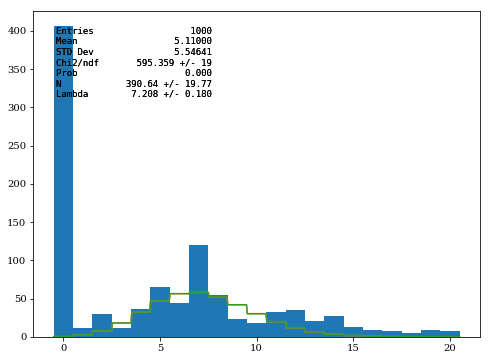

In [37]:
binwidth = (xmax-xmin) / Nbins 
xaxis = np.linspace(xmin, xmax, 500)
yaxis = binwidth*func_Poisson_vec(np.floor(xaxis+0.5), *minuit.args)
ax3.plot(xaxis, yaxis)
fig3